In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [11]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [12]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [13]:
age = pd.cut(titanic['age'],[0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [17]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [19]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [20]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [3]:
 births = pd.read_csv('births.csv')

In [1]:
import pandas as pd
import numpy as np

In [4]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0, 0.5, 'total births per day')

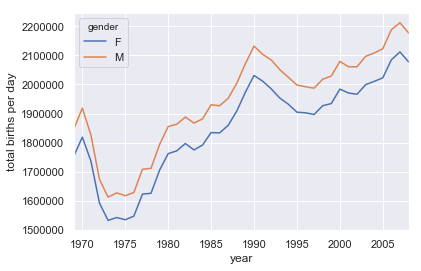

In [7]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per day')

In [8]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [9]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [15]:
births['day'] = births['day'].astype(int)

In [17]:
births.index = pd.to_datetime(10000*births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [18]:
import matplotlib as mpl

Text(0, 0.5, 'mean births by day')

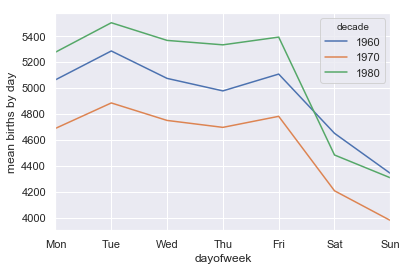

In [24]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [27]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [28]:
births_by_date.index = [pd.datetime(2012, month, day) for month,day in births_by_date.index]

In [29]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


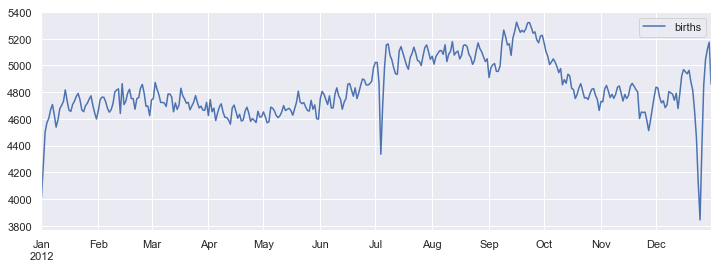

In [30]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In [1]:
import numpy as np

In [3]:
x = np.array([2,3,5,7,11,13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [4]:
data = ['Peter', 'Paul', 'MARY', 'gUIdo']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [5]:
data = ['Peter', 'Paul',None, 'MARY', 'gUIdo']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [12]:
import pandas as pd

In [7]:
names = pd.Series(data)
names

0    Peter
1     Paul
2     None
3     MARY
4    gUIdo
dtype: object

In [8]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [9]:
monte = pd.Series(['Bhavesh Suthar', 'Amit Suthar', 'Md Tahir', 'Mustaque Alam', 'Irfan Ali', 'Vikash Kumawat'])

In [10]:
monte

0    Bhavesh Suthar
1       Amit Suthar
2          Md Tahir
3     Mustaque Alam
4         Irfan Ali
5    Vikash Kumawat
dtype: object

In [11]:
monte.str.lower()

0    bhavesh suthar
1       amit suthar
2          md tahir
3     mustaque alam
4         irfan ali
5    vikash kumawat
dtype: object

In [12]:
monte.str.len()

0    14
1    11
2     8
3    13
4     9
5    14
dtype: int64

In [14]:
monte.str.startswith("M")

0    False
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [15]:
monte.str.split()

0    [Bhavesh, Suthar]
1       [Amit, Suthar]
2          [Md, Tahir]
3     [Mustaque, Alam]
4         [Irfan, Ali]
5    [Vikash, Kumawat]
dtype: object

In [17]:
monte.str.extract('([A-Za-z]+)')

,0
0,Bhavesh
1,Amit
2,Md
3,Mustaque
4,Irfan
5,Vikash


In [18]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Bhavesh Suthar]
1                  []
2          [Md Tahir]
3     [Mustaque Alam]
4                  []
5    [Vikash Kumawat]
dtype: object

In [19]:
monte.str[0:3]

0    Bha
1    Ami
2    Md 
3    Mus
4    Irf
5    Vik
dtype: object

In [20]:
monte.str.split().str.get(-1)

0     Suthar
1     Suthar
2      Tahir
3       Alam
4        Ali
5    Kumawat
dtype: object

In [22]:
full_monte = pd.DataFrame({'name': monte, 'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Bhavesh Suthar,B|C|D
1,Amit Suthar,B|D
2,Md Tahir,A|C
3,Mustaque Alam,B|D
4,Irfan Ali,B|C
5,Vikash Kumawat,B|C|D


In [23]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [10]:
from datetime import datetime

In [11]:
datetime(year = 2020, month = 7, day = 1)

datetime.datetime(2020, 7, 1, 0, 0)

In [15]:
from dateutil import parser
date = parser.parse("1st July, 2020")

In [16]:
date

datetime.datetime(2020, 7, 1, 0, 0)

In [17]:
date.strftime('%A')

'Wednesday'

In [2]:
import numpy as np

In [19]:
date = np.array('2020-07-01', dtype=np.datetime64)
date

array('2020-07-01', dtype='datetime64[D]')

In [20]:
date + np.arange(12)

array(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
       '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
       '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12'],
      dtype='datetime64[D]')

In [22]:
np.datetime64('2020-07-01')

numpy.datetime64('2020-07-01')

In [23]:
np.datetime64('2020-07-01 12:00')

numpy.datetime64('2020-07-01T12:00')

In [24]:
np.datetime64('2020-07-01 12:59:59.50', 'ns')

numpy.datetime64('2020-07-01T12:59:59.500000000')

In [25]:
date = pd.to_datetime("4th of july, 2015")

In [26]:
date

Timestamp('2015-07-04 00:00:00')

In [27]:
date.strftime('%A')

'Saturday'

In [28]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [29]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [30]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [31]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [32]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of july, 2015', '2015-Jul-6', '2015-07-07', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [33]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [34]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [35]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [36]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [37]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [38]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [39]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [3]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [4]:
from pandas.tseries.offsets import BDay

In [7]:
pd.date_range('2020-07-03', periods=5, freq=BDay())

DatetimeIndex(['2020-07-03', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09'],
              dtype='datetime64[ns]', freq='B')

In [2]:
from pandas_datareader import data

In [3]:
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [4]:
goog = goog['Close']

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

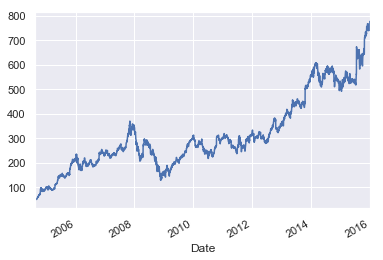

In [9]:
goog.plot()

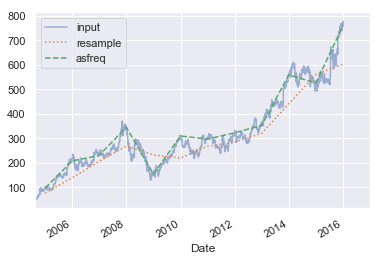

In [10]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

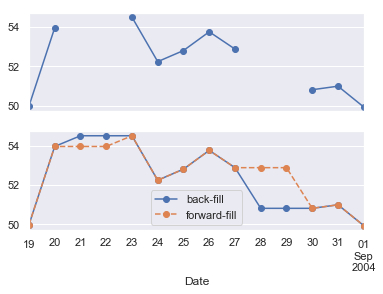

In [11]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill', 'forward-fill']);

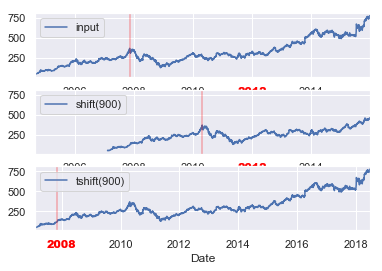

In [15]:
fig, ax = plt.subplots(3, sharey=True)

goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max, alpha=0.3, color='red');


Text(0, 0.5, '% Return on investment')

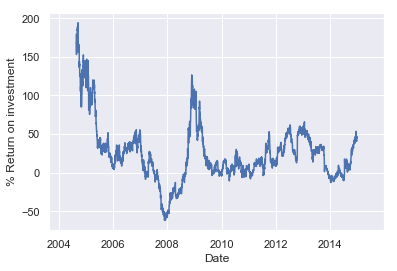

In [17]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on investment')

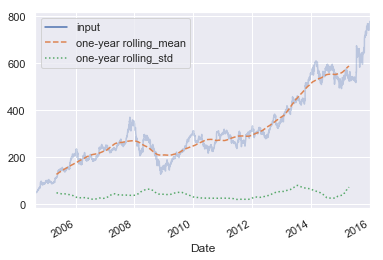

In [8]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [7]:
import pandas as pd

In [11]:
data = pd.read_csv('Fremont_Bridge.csv', index_col='Date', parse_dates=True)

In [12]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [14]:
data.columns = ['Total', 'West', 'East']

In [15]:
data.dropna().describe()

,Total,West,East
count,133385.000000,133385.000000,133385.000000
mean,113.127503,51.644285,61.483218
std,144.370088,66.604699,89.947209
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


In [16]:
%matplotlib inline
import seaborn; seaborn.set()

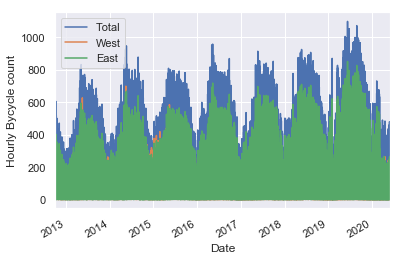

In [17]:
data.plot()
plt.ylabel('Hourly Bycycle count');

Text(0, 0.5, 'Weekly bycycle count')

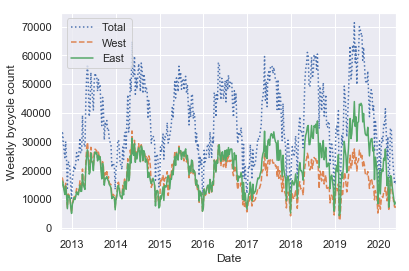

In [18]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bycycle count')

Text(0, 0.5, 'Mean hourly count')

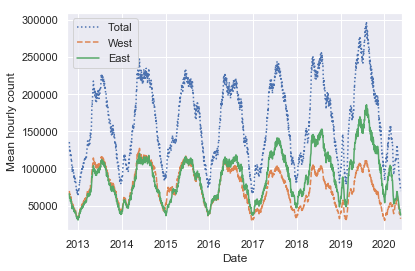

In [19]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('Mean hourly count')

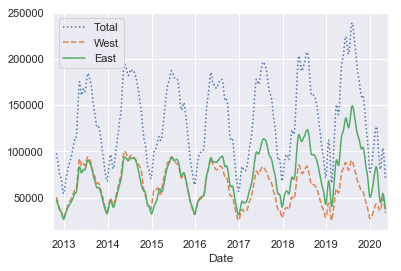

In [20]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

In [21]:
import numpy as np

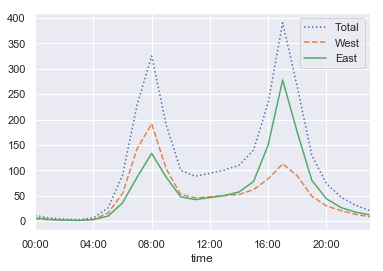

In [22]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

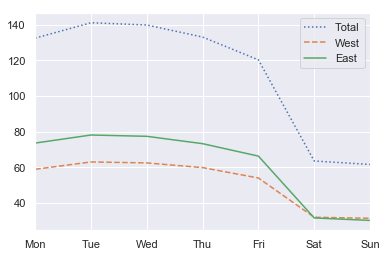

In [24]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [25]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

C:\Users\Bhavesh kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Bhavesh kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


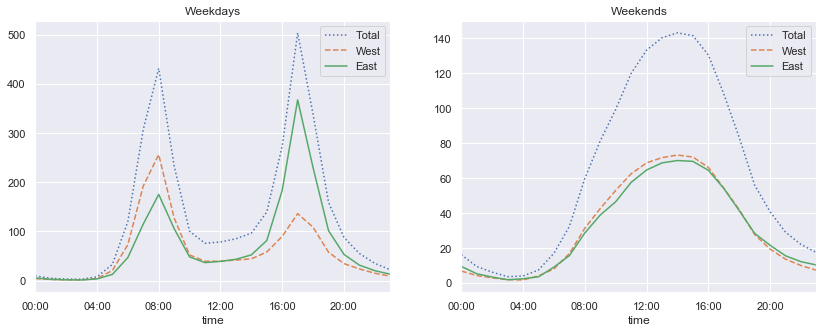

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])

In [12]:
import numpy as np


1.12 µs ± 10.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [25]:
rng = np.random.RandomState(42)
x = rng.rand(1,6)
y = rng.rand(1,6)
%timeit (x + y)

1.03 µs ± 17.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [26]:
mask = (x > 0.5) & (y < 0.5)

In [28]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2
mask

array([[False, False, False, False, False, False]])

In [29]:
import numexpr

In [32]:
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

In [33]:
import pandas as pd

C:\Users\Bhavesh kumar\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Bhavesh kumar\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [34]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

In [35]:
%timeit df1 + df2 + df3 + df4

186 ms ± 9.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%timeit pd.eval('df1 + df2 + df3 + df4')

92.7 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4'))

True

In [38]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) for i in range(5))

In [39]:
r1 = -df1 * df2 / (df3 + df4) - df5
r2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(r1, r2)

True

In [41]:
r1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
r2 = pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')
np.allclose(r1, r2)

True

In [42]:
r1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
r2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(r1, r2)

True

In [43]:
r3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(r1, r3)

True

In [45]:
r1 = df2.T[0] + df3.iloc[1]
r2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(r1, r2)

True

In [47]:
df2.iloc[1]

0    741
1    587
2     37
Name: 1, dtype: int32

In [48]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [51]:
r1 = (df['A'] + df['B']) / (df['C'] - 1)
r2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(r1, r2)

True

In [52]:
r3 = df.eval('(A + B) / (C - 1)')
np.allclose(r1, r3)

True

In [53]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [56]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


In [57]:
col_mean = df.mean(1)
r1 = df['A'] + col_mean
r2 = df.eval('A + @col_mean')
np.allclose(r1, r2)

True

In [59]:
r1 = df[(df.A < 0.5) & (df.B < 0.5)]
r2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(r1, r2)

True

In [60]:
r3 = df.query('A < 0.5 and B < 0.5')
np.allclose(r1, r3)

True

In [61]:
cmean = df['C'].mean()
r1 = df[(df.A < cmean) & (df.B < cmean)]
r2 = df.query('A < @cmean and B < @cmean')
np.allclose(r1, r2)

True

In [62]:
x = df[(df.A < 0.5) & (df.B < 0.5)]

In [63]:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

In [64]:
df.values.nbytes

32000